In [9]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os



from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)



Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


In [201]:
import tflearn
tf.reset_default_graph()

X_dim = 784
z_dim = 256
h_dim = 128

def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


X = tf.placeholder(tf.float32, shape=[None, 28, 28,1])
z = tf.placeholder(tf.float32, shape=[None, z_dim])
learning_rate_ph = tf.placeholder(tf.float32, name = 'learning_rate')


def sample_z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])


def upsample(images):
    _, width, height, depth = images.get_shape().as_list()
    return tf.image.resize_nearest_neighbor(images, [width*2, height*2], align_corners=None, name=None)




image_width = 28
def generator(z):
    m = z
    m = tflearn.layers.core.fully_connected(m, 1024, activation='LeakyReLU')
    m = tflearn.layers.core.fully_connected(m, 7*7*128, activation='LeakyReLU')
    m = tf.reshape(m,[-1,7,7,128])
    m = tflearn.conv_2d_transpose(m, 128, 5, [image_width/4, image_width/4, 128], strides=1, activation='leakyRelu')
    m = upsample(m)
    m = tflearn.conv_2d_transpose(m, 64, 5, [image_width/2, image_width/2, 64], strides=1, activation='leakyRelu')
    m = upsample(m)
    m = tflearn.conv_2d_transpose(m, 1, 5, [image_width, image_width, 1], strides=1, activation='tanh')
    return m

    
    
    
    
    
#     m = z
#     m = tflearn.layers.core.fully_connected(m, 7*7, activation='LeakyReLU')
#     m = tflearn.layers.core.fully_connected(m, 20*7*7, activation='LeakyReLU')
#     m = tf.reshape(m,[-1,7,7,20])
    
    
#     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width/4, image_width/4, 32], strides=1, activation='relu', weights_init = 'xavier')
#     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width/4, image_width/4, 32], strides=1, activation='relu', weights_init = 'xavier')
    
#     m = upsample(m)

    
#     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width/2, image_width/2, 32], strides=1, activation='relu', weights_init = 'xavier')
#     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width/2, image_width/2, 32], strides=1, activation='relu', weights_init = 'xavier')

#     m = upsample(m)

#     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width, image_width, 32], strides=1, activation='relu', weights_init = 'xavier')
#     m = tflearn.conv_2d_transpose(m, 1, 5, [image_width, image_width, 1], strides=1, activation='tanh', weights_init = 'xavier')
#     return m
    
#     m = z 
#     m = tflearn.layers.core.fully_connected(m, 7*7, activation='LeakyReLU')
#     m = tf.reshape(m,[-1,7,7,1])
#     m = tflearn.conv_2d_transpose(m, 16, 5, [image_width/4, image_width/4, 16], strides=1, activation='relu')
# #     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width/4, image_width/4, 32], strides=1, activation='LeakyReLU')

#     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width/2, image_width/2, 32], strides=2, activation='relu')
# #     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width/2, image_width/2, 32], strides=1, activation='LeakyReLU')

#     m = tflearn.conv_2d_transpose(m, 32, 5, [image_width, image_width, 32], strides=2, activation='relu')
#     m = tflearn.conv_2d_transpose(m, 1, 5, [image_width, image_width, 1], strides=1, activation='sigmoid')
#     print "generator output shape", m.get_shape()

#     m = z 
#     m = tflearn.layers.core.fully_connected(m, 7*7, activation='LeakyReLU')
#     m = tflearn.layers.core.fully_connected(m, 128, activation='LeakyReLU')
#     m = tflearn.layers.core.fully_connected(m, 256, activation='LeakyReLU')

#     m = tflearn.layers.core.fully_connected(m, 7*7*30, activation='LeakyReLU')
#     m = tf.reshape(m,[-1,7,7,30])
#     m = tflearn.conv_2d_transpose(m, 1, 3, [image_width/4, image_width/4, 1], strides=1, activation='relu')
#     m = bilinear_upsample(m)
#     m = tflearn.conv_2d_transpose(m, 1, 3, [image_width/2, image_width/2, 1], strides=1, activation='relu')
#     m = tflearn.conv_2d_transpose(m, 1, 3, [image_width/2, image_width/2, 1], strides=1, activation='relu')
#     m = bilinear_upsample(m)
#     m = tflearn.conv_2d_transpose(m, 1, 5, [image_width, image_width, 1], strides=2, activation='relu')
#     m = tflearn.conv_2d_transpose(m, 1, 4, [image_width, image_width, 1], strides=4, activation='tanh')
#     m = tflearn.layers.core.fully_connected(m, 256, activation='relu')
    
    
#     m = tflearn.layers.core.fully_connected(m, (image_width)**2, activation='relu')
#     m = tf.reshape(m,[-1,image_width/2, image_width/2, 8])
#     m = tflearn.conv_2d_transpose(m, 1, 2, [image_width, image_width, 1], strides=2, activation='sigmoid')
#     m = tflearn.conv_2d_transpose(m, 1,5, [image_width, image_width, 1], strides=1, activation='sigmoid')

#     m = tflearn.layers.core.fully_connected(m, 28**2, activation='tanh')

#     print "generator output shape", m.get_shape()

#     return m


def discriminator(x):
    m = tf.reshape(x, shape=[-1, 28, 28, 1])
    m = tflearn.layers.conv.conv_2d(x, 11, 5, strides = 2, activation = "LeakyReLU")
    m = tflearn.layers.conv.conv_2d(x, 75, 5, strides = 2, activation = "LeakyReLU")
    m = tflearn.layers.fully_connected(x, 1024, activation = "LeakyReLU")
    logit = tflearn.layers.fully_connected(m, 1, activation='linear', weights_init = 'xavier')
    return logit
    
    
#     m = tf.reshape(x, shape=[-1, 28, 28, 1])
#     m = tflearn.layers.conv.conv_2d(x, 8, 5, activation = "relu")
#     m = tflearn.layers.conv.conv_2d(x, 32, 5, activation = "relu")

#     m = tflearn.layers.conv.conv_2d(m, 32, 5, activation = "relu")

#     m = tflearn.layers.conv.max_pool_2d(m, 2)
#     m = tflearn.layers.conv.conv_2d(m, 64, 5, activation = "relu")
#     m = tflearn.layers.conv.conv_2d(m, 64, 5, activation = "relu")

#     m = tflearn.layers.conv.max_pool_2d(m, 2)
#     m = tflearn.layers.conv.conv_2d(m, 64, 5, activation = "relu")
#     m = tflearn.layers.fully_connected(m, 32, activation='relu')
#     out = tflearn.layers.fully_connected(m, 1, activation='linear')


#     m = tflearn.layers.fully_connected(x, 512, activation = "LeakyReLU", weights_init = 'xavier')
#     m = tflearn.layers.fully_connected(m, 256, activation = "LeakyReLU", weights_init = 'xavier')
#     m = tflearn.layers.fully_connected(m, 128, activation = "LeakyReLU", weights_init = 'xavier')
#     m = tflearn.layers.fully_connected(m, 128, activation = "LeakyReLU", weights_init = 'xavier')
#     out = tflearn.layers.fully_connected(m, 1, activation='linear')
#     return out



#     x = tf.reshape(x, shape=[-1, 28, 28, 1])
#     m = tflearn.layers.conv.conv_2d(x, 32, 4, activation = "LeakyReLU", weights_init = 'xavier')
#     m = tflearn.layers.conv.conv_2d(x, 32, 4, activation = "LeakyReLU", weights_init = 'xavier')

#     m = tflearn.layers.conv.avg_pool_2d(m, 2)
#     m = tflearn.layers.conv.conv_2d(m, 32, 4, activation = "LeakyReLU", weights_init = 'xavier')
#     m = tflearn.layers.conv.conv_2d(m, 32, 4, activation = "LeakyReLU", weights_init = 'xavier')

#     m = tflearn.layers.conv.avg_pool_2d(m, 2)
#     m = tflearn.layers.conv.conv_2d(m, 16, 4, activation = "LeakyReLU", weights_init = 'xavier')
#     m = tflearn.layers.conv.conv_2d(m, 16, 4, activation = "LeakyReLU", weights_init = 'xavier')

#     print "last D conv layer shape", m.get_shape()
#     m = tflearn.layers.fully_connected(m, 75, activation='LeakyReLU', weights_init = 'xavier')

#     logit = tflearn.layers.fully_connected(m, 1, activation='linear', weights_init = 'xavier')
#     return logit


with tf.variable_scope("gen"):
    G_sample = generator(z)
    
with tf.variable_scope("crit"):
    D_real = discriminator(X)

with tf.variable_scope("crit", reuse=True):
    D_fake = discriminator(G_sample)

D_loss = tf.reduce_mean(D_real) - tf.reduce_mean(D_fake)
G_loss = -tf.reduce_mean(D_fake)



D_solver = (tf.train.RMSPropOptimizer(learning_rate=learning_rate_ph)
            .minimize(-D_loss, var_list= tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='crit')))
G_solver = (tf.train.RMSPropOptimizer(learning_rate=learning_rate_ph)
            .minimize(G_loss, var_list= tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='gen')))

clip_D = [p.assign(tf.clip_by_value(p, -.01, .01)) for p in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='crit')]

sess = tf.Session()
sess.run(tf.initialize_all_variables())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

G_loss_record = []
D_loss_record = []

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Autosaving every 30 seconds
Iter: 0; D loss: 0.002021; G_loss: 0.007615


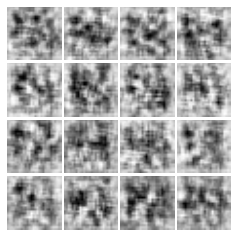

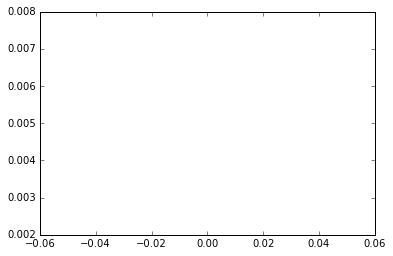

Iter: 600; D loss: 0.1338; G_loss: -2.051


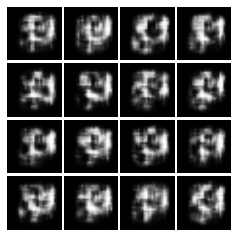

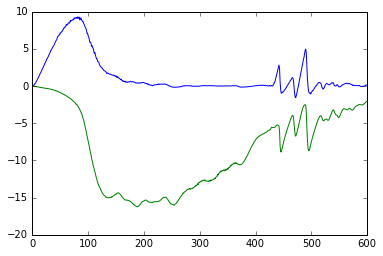

Iter: 1200; D loss: 0.2578; G_loss: -2.37


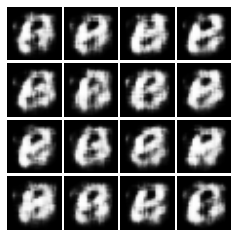

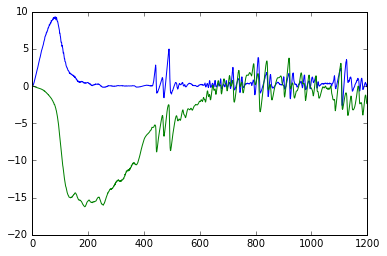

Iter: 1800; D loss: 0.6997; G_loss: -0.2169


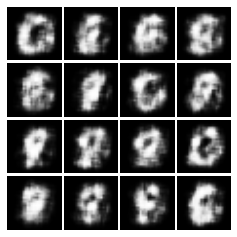

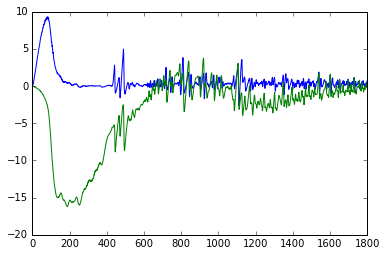

Iter: 2400; D loss: 0.0974; G_loss: -0.165


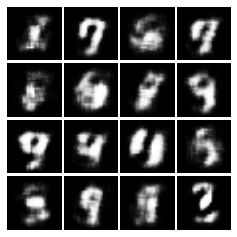

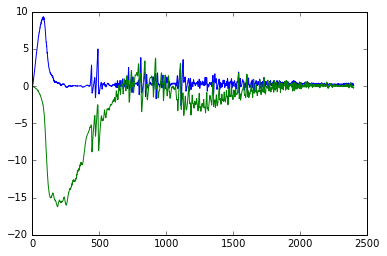

Iter: 3000; D loss: 0.2073; G_loss: -0.4408


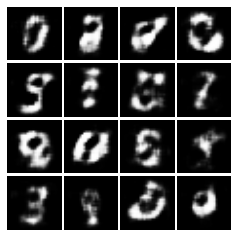

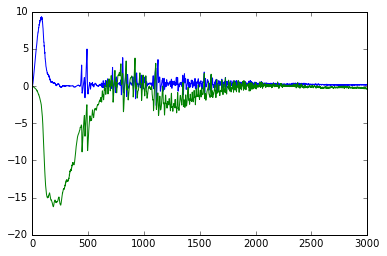

Iter: 3600; D loss: 0.1685; G_loss: -0.2843


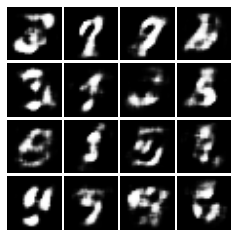

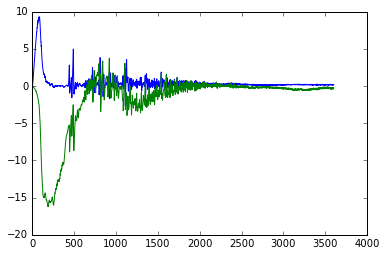

Iter: 4200; D loss: 0.179; G_loss: -0.4171


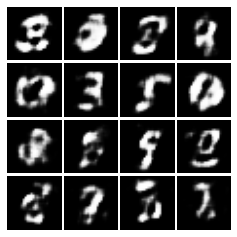

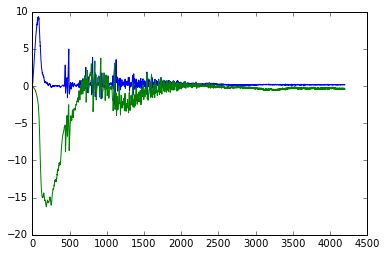

Iter: 4800; D loss: 0.1708; G_loss: -0.6089


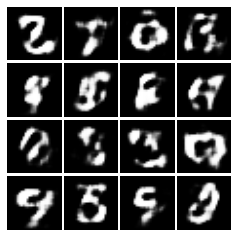

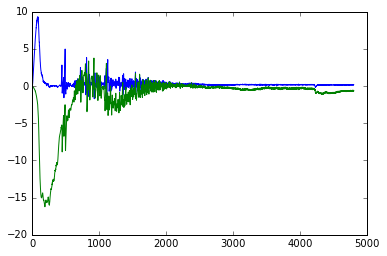

Iter: 5400; D loss: 0.1415; G_loss: -0.6008


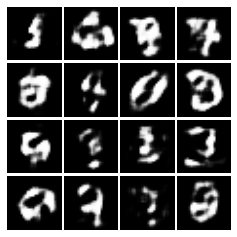

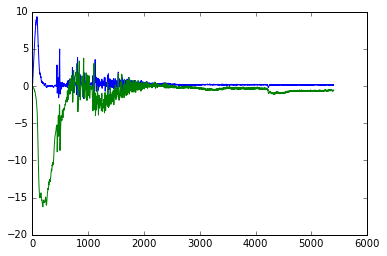

Iter: 6000; D loss: 0.1494; G_loss: -0.7703


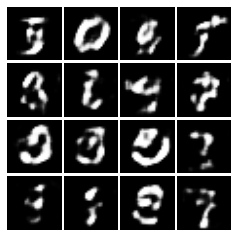

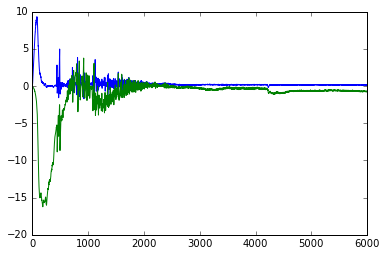

Iter: 6600; D loss: 0.1409; G_loss: -0.8135


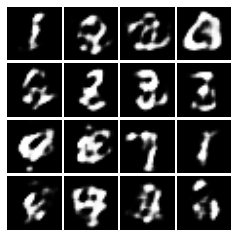

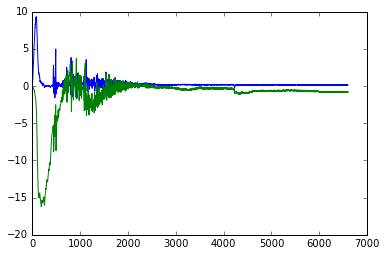

Iter: 7200; D loss: 0.129; G_loss: -0.9257


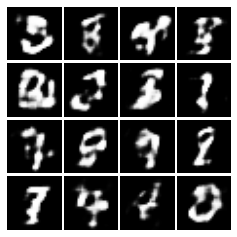

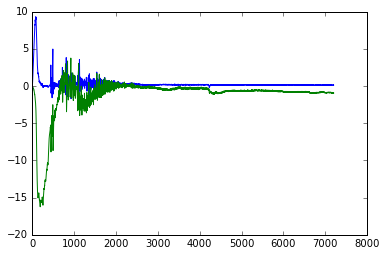

Iter: 7800; D loss: 0.1282; G_loss: -1.026


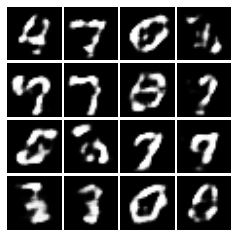

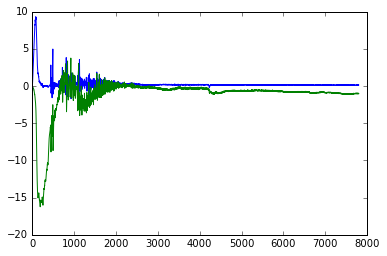

Iter: 8400; D loss: 0.1181; G_loss: -0.9082


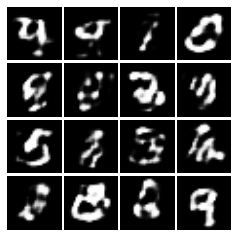

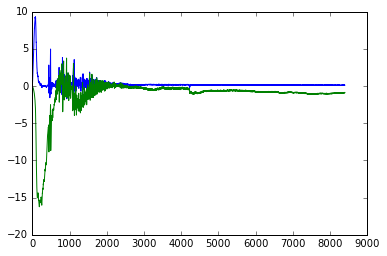

Iter: 9000; D loss: 0.09759; G_loss: -0.8958


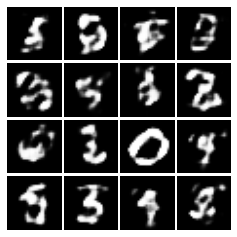

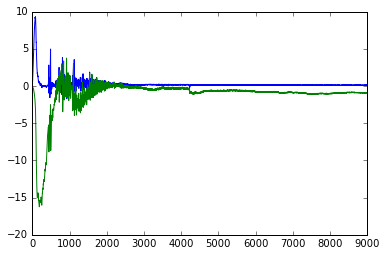

Iter: 9600; D loss: 0.09722; G_loss: -0.8637


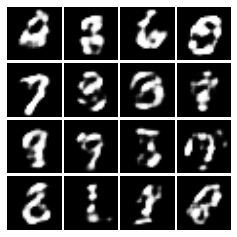

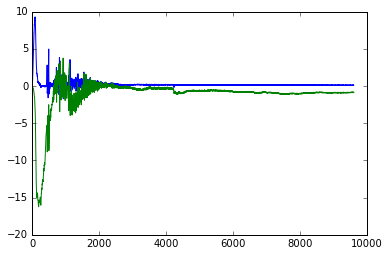

Iter: 10200; D loss: 0.09469; G_loss: -0.8275


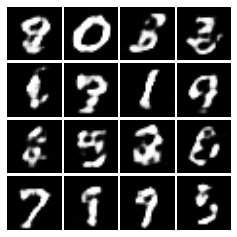

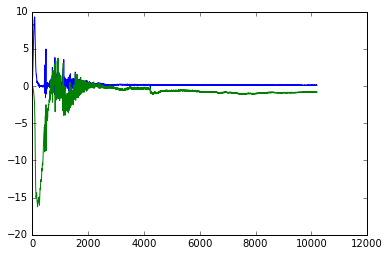

Iter: 10800; D loss: 0.08439; G_loss: -0.9301


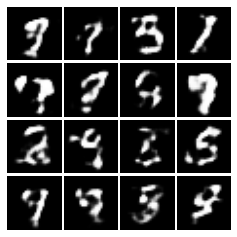

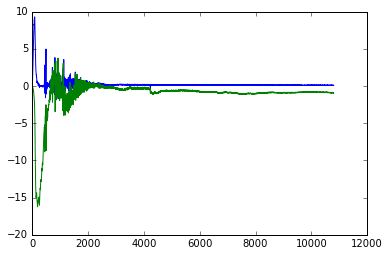

Iter: 11400; D loss: 0.09268; G_loss: -0.9257


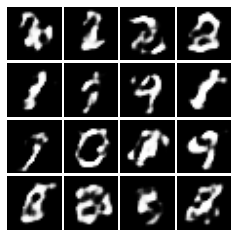

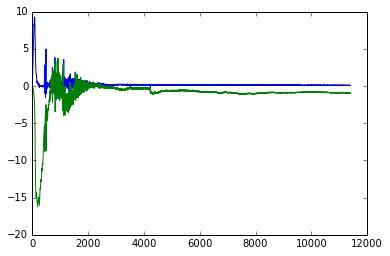

Iter: 12000; D loss: 0.08155; G_loss: -0.9162


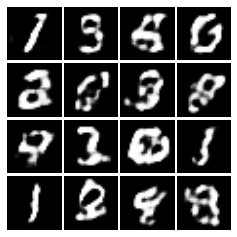

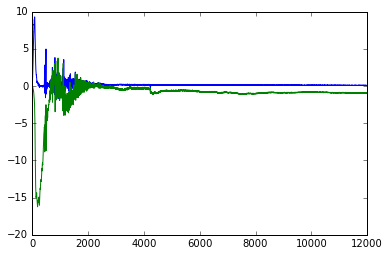

Iter: 12600; D loss: 0.07811; G_loss: -0.939


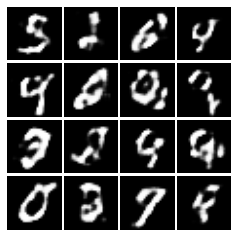

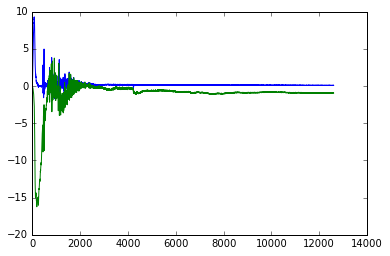

Iter: 13200; D loss: 0.07711; G_loss: -0.9449


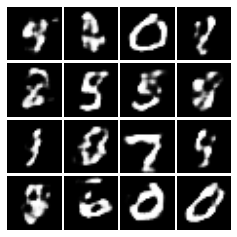

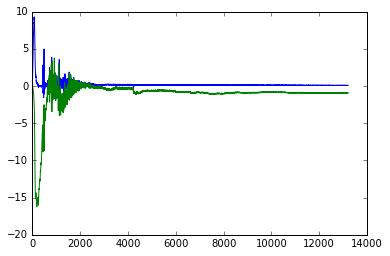

Iter: 13800; D loss: 0.08542; G_loss: -0.9158


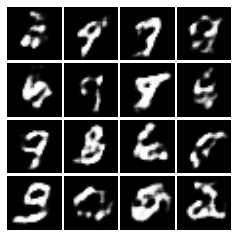

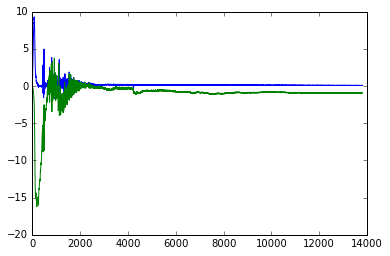

Iter: 14400; D loss: 0.06815; G_loss: -0.9035


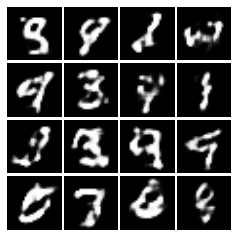

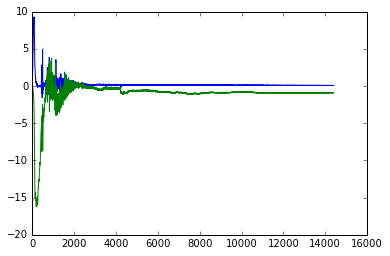

Iter: 15000; D loss: 0.07076; G_loss: -0.9017


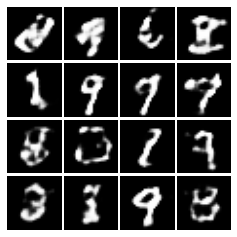

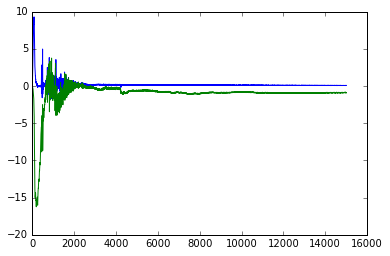

Iter: 15600; D loss: 0.07821; G_loss: -0.8641


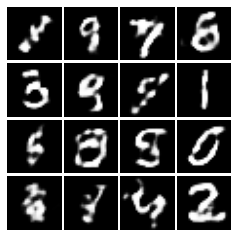

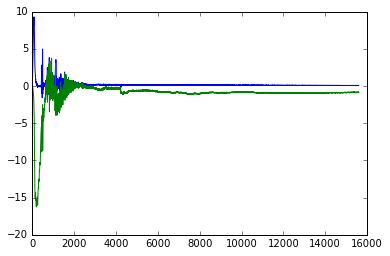

Iter: 16200; D loss: 0.06748; G_loss: -0.8264


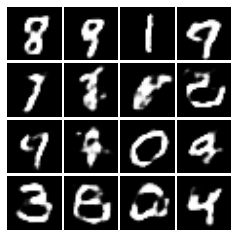

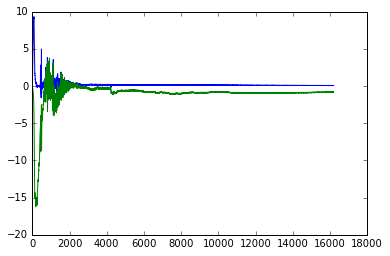

Iter: 16800; D loss: 0.06418; G_loss: -0.8497


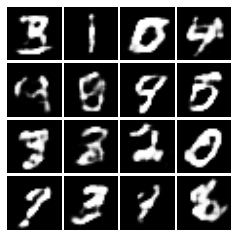

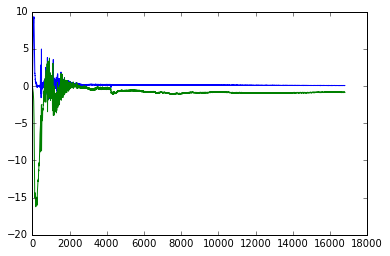

Iter: 17400; D loss: 0.066; G_loss: -0.8986


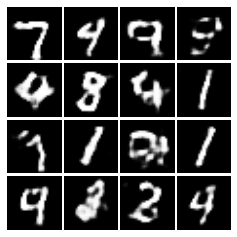

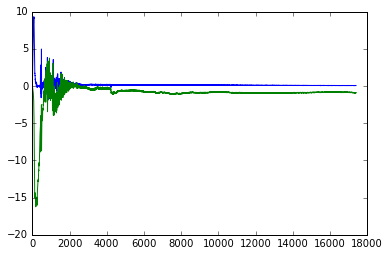

Iter: 18000; D loss: 0.04632; G_loss: -0.9611


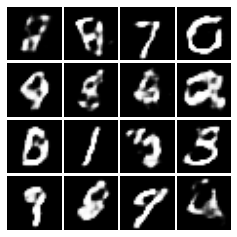

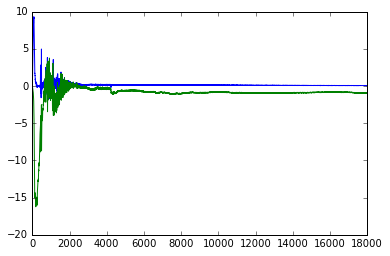

Iter: 18600; D loss: 0.05681; G_loss: -0.9087


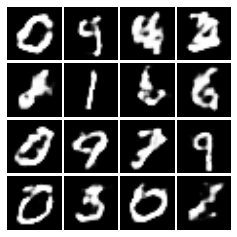

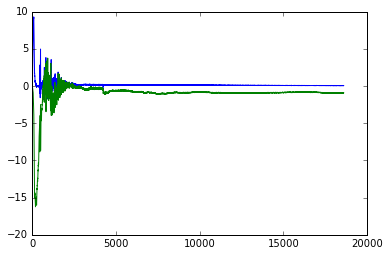

Iter: 19200; D loss: 0.04965; G_loss: -0.9099


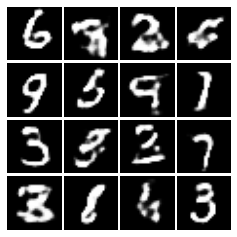

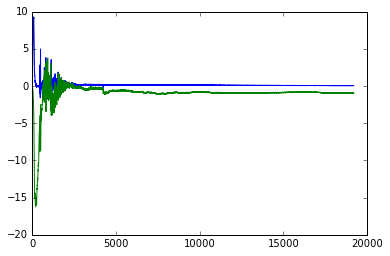

KeyboardInterrupt: 

In [202]:
mb_size = 128

%autosave 30

%matplotlib inline
for it in range(2000*100):
    D_loss_curr = 100
    i = 0
#     while D_loss_curr > 1 and i < 5:
    for _ in range(10):
        X_mb, _ = mnist.train.next_batch(mb_size)
        X_mb = X_mb.reshape(-1, 28,28,1) * 2 - 1
        
        lr = .00001
        
        _, D_loss_curr, _ = sess.run(
            [D_solver, D_loss, clip_D],
            feed_dict={X: X_mb, z: sample_z(mb_size, z_dim), learning_rate_ph: lr}
        )
        i += 1
    D_loss_record.append(D_loss_curr)

    _, G_loss_curr = sess.run(
        [G_solver, G_loss],
        feed_dict={z: sample_z(mb_size, z_dim), learning_rate_ph: lr}
    )
    G_loss_record.append(G_loss_curr)


    if it % 600 == 0:
        print('Iter: {}; D loss: {:.4}; G_loss: {:.4}'
              .format(it, D_loss_curr, G_loss_curr))

        if it % 100 == 0:
            samples = sess.run(G_sample, feed_dict={z: sample_z(16, z_dim)})

            fig = plot(samples)
            i += 1
            plt.show()
            plt.plot(D_loss_record)
#             plt.title("D loss")
#             plt.show()
            plt.plot(G_loss_record)
#             plt.title("G loss")
            plt.show()

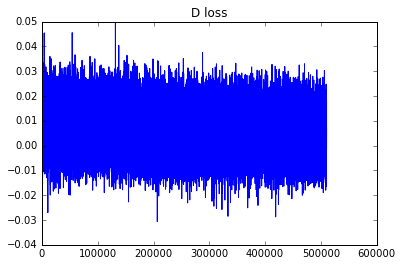

In [77]:
plt.plot(D_loss_record[600000:])
plt.title("D loss")
plt.show()

Extracting ~/Desktop/MNIST_data/train-images-idx3-ubyte.gz
Extracting ~/Desktop/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ~/Desktop/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ~/Desktop/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iter: 0; D loss: 0.00955; G_loss: 0.009552


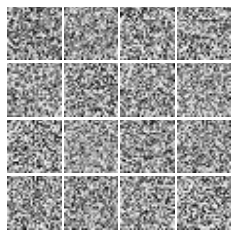

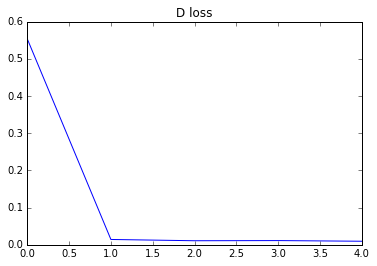

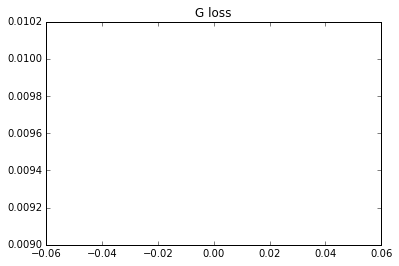

Iter: 100; D loss: 2.1; G_loss: 1.748


KeyboardInterrupt: 

In [13]:
%matplotlib inline
G_loss_record = []
D_loss_record = []
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os


mb_size = 32
X_dim = 784
z_dim = 10
h_dim = 128

mnist = input_data.read_data_sets('~/Desktop/MNIST_data', one_hot=True)


def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


X = tf.placeholder(tf.float32, shape=[None, X_dim])

D_W1 = tf.Variable(xavier_init([X_dim, h_dim]))
D_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

D_W2 = tf.Variable(xavier_init([h_dim, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]


z = tf.placeholder(tf.float32, shape=[None, z_dim])

G_W1 = tf.Variable(xavier_init([z_dim, h_dim]))
G_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

G_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
G_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

theta_G = [G_W1, G_W2, G_b1, G_b2]


def sample_z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])


def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)
    return G_prob


def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    out = tf.matmul(D_h1, D_W2) + D_b2
    return out


G_sample = generator(z)
D_real = discriminator(X)
D_fake = discriminator(G_sample)

D_loss = tf.reduce_mean(D_real) - tf.reduce_mean(D_fake)
G_loss = -tf.reduce_mean(D_fake)

D_solver = (tf.train.RMSPropOptimizer(learning_rate=1e-4)
            .minimize(-D_loss, var_list=theta_D))
G_solver = (tf.train.RMSPropOptimizer(learning_rate=1e-4)
            .minimize(G_loss, var_list=theta_G))

clip_D = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in theta_D]

sess = tf.Session()
sess.run(tf.initialize_all_variables())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

for it in range(1000000):
    for _ in range(5):
        X_mb, _ = mnist.train.next_batch(mb_size)

        _, D_loss_curr, _ = sess.run(
            [D_solver, D_loss, clip_D],
            feed_dict={X: X_mb, z: sample_z(mb_size, z_dim)}
        )
        D_loss_record.append(D_loss_curr)

    _, G_loss_curr = sess.run(
        [G_solver, G_loss],
        feed_dict={z: sample_z(mb_size, z_dim)}
    )
    G_loss_record.append(G_loss_curr)

    if it % 100 == 0:
        print('Iter: {}; D loss: {:.4}; G_loss: {:.4}'
              .format(it, D_loss_curr, G_loss_curr))

        if it % 1000 == 0:
            samples = sess.run(G_sample, feed_dict={z: sample_z(16, z_dim)})

            fig = plot(samples)
#             plt.savefig('out/{}.png'
#                         .format(str(i).zfill(3)), bbox_inches='tight')
            i += 1
#             plt.close(fig)
            plt.show()
            plt.plot(D_loss_record)
            plt.title("D loss")
            plt.show()
            plt.plot(G_loss_record)
            plt.title("G loss")
            plt.show()